# Preliminaries

Python version: python 3.5.2

# Take aways

- The value of the optimal learning rate is increased from $\eta = 0.0001$ to $\eta = 0.001$ after stadardization.

- The number of epochs need for convergence is decreased from about 140 to 10 after standardization. i.e The time of learning has been reduced.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

# Generation of samples and plotting


Shape of original data samples for each category: (300, 2)
Shape of augmented data samples for each category: (300, 3)
Shape of input samples of train data and test data: (400, 3) (200, 3)
Shape of teaching values of train data and test data: (400, 1) (200, 1)


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


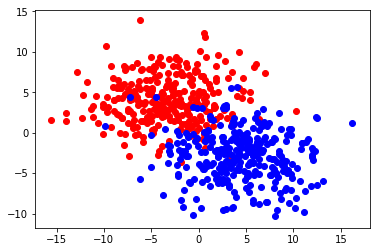

In [2]:
# the samples are generated with given mean and co-variance matrix
mu1 = np.array([-3, 4])
mu2 = np.array([4, -3])
sigma = np.array([[16, 0], [0, 9]])

w1catpoints = np.random.multivariate_normal(mu1, sigma, 300)
w2catpoints = np.random.multivariate_normal(mu2, sigma, 300)

# Augmented data is created by appending ones to the input data
w1catpoints_aug =  np.append(w1catpoints, np.ones((300,1)),axis=1)
w2catpoints_aug =  np.append(w2catpoints, np.ones((300,1)),axis=1)

# Train data and Test data is created
X_aug_train = np.concatenate((w1catpoints_aug[:200], w1catpoints_aug[:200]))
X_aug_test = np.concatenate((w1catpoints_aug[-100:], w2catpoints_aug[-100:]))
Yobv_train = np.append(np.ones((200,1)), -1*np.ones((200,1))).reshape((400,1))
Yobv_test = np.append(np.ones((100,1)), -1*np.ones((100,1))).reshape((200,1))

print("Shape of original data samples for each category:", w1catpoints.shape)
print("Shape of augmented data samples for each category:", w1catpoints_aug.shape)
print("Shape of input samples of train data and test data:",X_aug_train.shape,X_aug_test.shape)
print("Shape of teaching values of train data and test data:",Yobv_train.shape,Yobv_test.shape)


# plot the original data
f = plt.figure(0)
plt.scatter(w1catpoints[:,0], w1catpoints[:,1], color='red')
plt.scatter(w2catpoints[:,0], w2catpoints[:,1], color='blue')
f.show()

# Gradient Descent with Different Learning rates

The learning rate is varied with values $0.1, 0.01, 0.001, 0.0005, 0.0001, 0.00001$

For values $0.1, 0.01, 0.001, 0.0005$ of $\eta$, the gradient descent is diverging.

For values $0.0001$, and $0.00001$ of $\eta$, the gradient descent is converging. However, the number of epochs to reach the minima is more for $\eta = 0.00001$ than for $\eta = 0.0001$.

So, the optimal learning rate is $\eta = 0.0001$.


In [16]:
Jtrain = 10
Jtrain_prev = 100
W = np.array([-0.01,0,0.01,]).reshape((1,3))
eta = 0.0001

Jvalues_train = []
Jvalues_test = []
Wvalues = []

def calc_J(W,X,Yobv,Ypred):
    return np.mean(np.square(Yobv-Ypred))/2


def calc_dW(W,X,Yobv,Ypred):
    return np.sum(-(Yobv-Ypred)*X,axis=0)

while(abs(Jtrain-Jtrain_prev) > 1e-8):
    Jtrain_prev = Jtrain
    Ypred_train = np.dot(W,X_aug_train.T).reshape((400,1))
    Ypred_test = np.dot(W,X_aug_test.T).reshape((200,1))
    dW = calc_dW(W, X_aug_train, Yobv_train, Ypred_train)
    W = W-(eta*dW)
    Jtrain = calc_J(W, X_aug_train,Yobv_train,Ypred_train)
    Jtest = calc_J(W, X_aug_test, Yobv_test, Ypred_test)
    Jvalues_train.append(Jtrain)
    Jvalues_test.append(Jtest)
    Wvalues.append(W)
    
print("The number of epochs to reach convergence is: ", len(Jvalues_train))
print("Error after last epoch is {} and the correspoding weights are {}".format(Jvalues_train[-1],Wvalues[-1]))

ValueError: shapes (1,3) and (400,3) not aligned: 3 (dim 1) != 400 (dim 0)

In [7]:
(Yobv-Ypred).shape

NameError: name 'Yobv' is not defined

# Error versus Epoch curve 

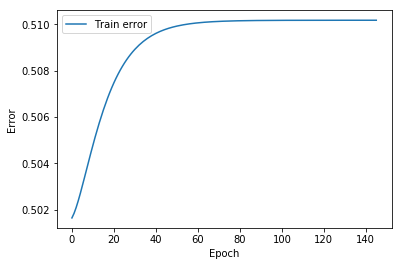

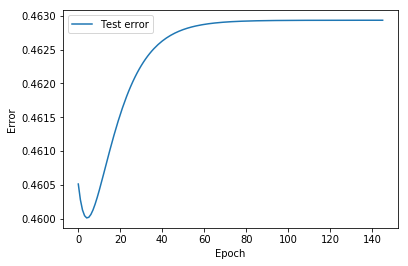

In [4]:
f = plt.figure(0)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(range(len(Jvalues_train)), Jvalues_train, label='Train error')
plt.legend()
f.show()


f = plt.figure(1)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(range(len(Jvalues_test)), Jvalues_test, label='Test error')
plt.legend()
f.show()

# Bayes Error (Q4.3 and Q4.4)

- Given data is generated from the normal distributions. The normal distribution curves are defined over infinite space. So, the generated data can be considred as non-linearly separable. i.e classes overlap.
- We have employed single liear output unit. i.e the final classifier is a hyper-plane.
- The given linear classifier can't classiy the given data without any misclassifications. This error is called irreducible error or minimum error or bayes error.

<img src="bayeserror.png">

- Overtraining occurs if the neural network is too powerful for the current problem. It then does not "recognize" the underlying trend in the data, but learns the data by heart (including the noise in the data). In case of given problem, the data is generated from the gaussian distributions and data is non-linearly separable. So, there exist an irreducible error/minimum error/bayes error that can not be reduced irrespective of the weight vector obtained through the back propagation. The given model is linear model so, no matter how many epochs we run, the model can never overfit the data and reduce the error beyond the minimum error.


- The loss function is squared error criterion. we know that, models trained via backpropagation on a sum-squared error criterion form a least squares fit to the Bayes discriminant functions. In other words, a linear model defined along with squared error criterion acts as Bayes classifier. Also, a quadratic function (given error function) has no local minimas and has only one global minima. We know that using gradient descent, we can reach the global minima by selecting a appropriate learning rate. Also, the value global minima of the the quadratic loss function defined over data from gaussian distribution is bayes error. So, the current linear model we built can reach the global minima which is the Bayes error.

# Standardization

Formula:

$$ X_{new} = \frac{X - \mu}{\sigma}$$

In [5]:
def Standardization(a):
    return (a - np.mean(a, axis = 0))/np.std(a, axis = 0)

# Standardization effects on Optimal Learning rate and Epochs

After standardization of the data, the learning rate is varied with values $0.1, 0.01, 0.001, 0.0005, 0.0001, 0.00001$

For values $0.1, 0.01, 0.005$ of $\eta$, the gradient descent is diverging.

For values $0.001, 0.0001, 0.00001$ of $\eta$, the gradient descent is converging. However, the number of epochs to reach the minima is more for $\eta = 0.00001$ and $\eta = 0.0001$ than for $\eta = 0.001$.

So, the optimal learning rate is $\eta = 0.001$.

- The value of the optimal learning rate is increased from $\eta = 0.0001$ to $\eta = 0.001$ after stadardization.

- The number of epochs need for convergence is decreased from about 140 to 10 after standardization. i.e The time of learning has been reduced.


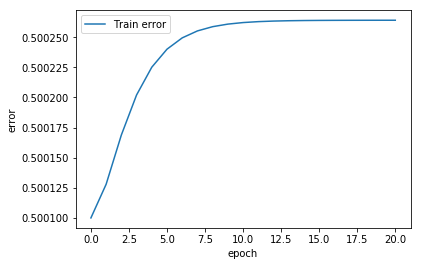

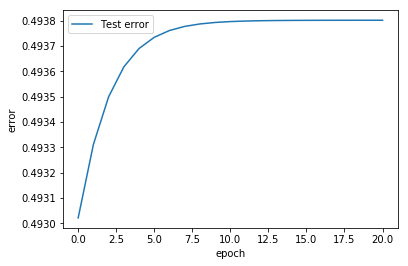

In [6]:
X_train = np.concatenate((w1catpoints[:200], w1catpoints[:200]))
X_test = np.concatenate((w1catpoints[-100:], w2catpoints[-100:]))

XS_train = Standardization(X_train)
XS_test = Standardization(X_test)

XS_aug_train = np.append(XS_train, np.ones((len(XS_train),1)),axis=1)
XS_aug_test = np.append(XS_test, np.ones((len(XS_test),1)),axis=1)


Jtrain = 10
Jtrain_prev = 100
W = np.array([-0.01,0,0.01,]).reshape((1,3))
eta = 0.001

Jvalues_train = []
Jvalues_test = []
Wvalues = []

while(abs(Jtrain-Jtrain_prev) > 1e-8):
    Jtrain_prev = Jtrain
    Ypred_train = np.dot(W,XS_aug_train.T).reshape((400,1))
    Ypred_test = np.dot(W,XS_aug_test.T).reshape((200,1))
    dW = calc_dW(W, XS_aug_train, Yobv_train, Ypred_train)
    W = W-(eta*dW)
    Jtrain = calc_J(W, XS_aug_train,Yobv_train,Ypred_train)
    Jtest = calc_J(W, XS_aug_test, Yobv_test, Ypred_test)
    Jvalues_train.append(Jtrain)
    Jvalues_test.append(Jtest)
    Wvalues.append(W)

f = plt.figure(0)
plt.xlabel("epoch")
plt.ylabel("error")
plt.plot(range(len(Jvalues_train)), Jvalues_train, label='Train error')
plt.legend()
f.show()

f = plt.figure(1)
plt.xlabel("epoch")
plt.ylabel("error")
plt.plot(range(len(Jvalues_test)), Jvalues_test, label='Test error')
plt.legend()
f.show()